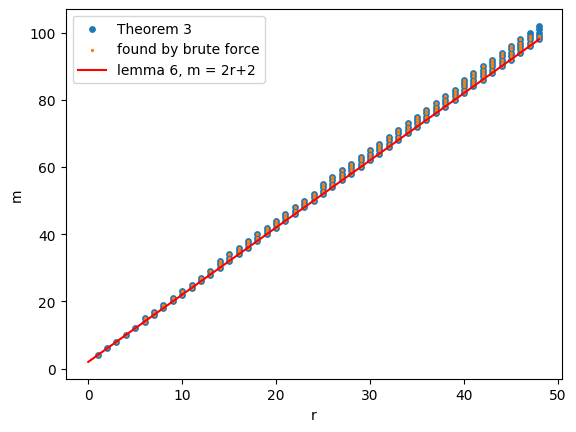

In [2]:
#QRM rates
import math
 
def binom_sum(m,start,end):
    sum_binom = 0
    for i in range(end-start+1):
        sum_binom += math.comb(m,start+i)
    return sum_binom
 
def catalytic_rate(r, m): #TPC
    m1=m
    m2=m # m2 > m1
    r1 = r # From RM(0,m1) code
    r2 = r# m2-r-1 # r2 = 0
    return (pow(2, m1+m2) - (2*binom_sum(m1,0,m1-r1-1)*binom_sum(m2,0,m2-r2-1)))/pow(2, m1+m2)

points = []
rs = []
ms = []
m_list = list(range(1, 100))
for m in m_list:
    for r in range(int((m-1)/2)+1):
        if m-r-1 < m/2: #checking not self-dual containing.
            continue
        cr = catalytic_rate(r, m)
        if cr > 0:
            #print(r, m, cr)
            points.append([r, m])
            rs.append(r)
            ms.append(m)

import matplotlib.pyplot as plt

#adding theorem 3 bound
def lr(r):
    diff = 1
    i = 0
    prods = [math.comb(2*r, u) for u in range(r+1)]
    while diff > 0:
        i+=1
        prods = [p*(2*r + i)/(2*r + i -u) for u, p in enumerate(prods)]
        diff = sum(prods) - ((2**(2*r + i))/(2 + math.sqrt(2)))
    return i-1

rs_thm = []
ms_thm = []
points_thm = []

for r in range(max(rs)+1):
    l =  lr(r)
    m_allowed = [2*r + s for s in range(1, l+1)]
    for m in m_allowed:
        if m-r-1 < m/2: #checking not self-dual containing.
            continue
        cr = catalytic_rate(r, m) #sanity check
        if cr > 0:
            #print(r, m, cr)
            points_thm.append([r, m])
            rs_thm.append(r)
            ms_thm.append(m)

r_lemma = list(range(max(rs)+1))
m_lemma = [r*2 + 2 for r in r_lemma]

r_lemma_n = list(range(max(rs)+1))
m_lemma_n = [r*3 + 1 for r in r_lemma]

plt.scatter(rs_thm, ms_thm, s = 15, label = 'Theorem 3')
plt.scatter(rs, ms, s=2, label = 'found by brute force')
plt.plot(r_lemma, m_lemma, label = 'lemma 6, m = 2r+2', color='r')
#plt.plot(r_lemma_n, m_lemma_n, label = 'm = 3r+1', color='g')
plt.legend()
plt.xlabel('r')
plt.ylabel('m')
plt.savefig('EATPRM.png')

In [ ]:
#QRM rates
import math
 
def binom_sum(m,start,end):
    sum_binom = 0
    for i in range(end-start+1):
        sum_binom += math.comb(m,start+i)
    return sum_binom
 
def EA_rate(r, m):
    m1 =m
    m2 =m # m2 > m1
    r1 =r # From RM(0,m1) code
    r2 =r# m2-r-1 # r2 = 0
    return (pow(2, m1+m2) - (2*binom_sum(m1,0,m1-r1-1)*binom_sum(m2,0,m2-r2-1)) + (binom_sum(m1,r1+1,m1-r1-1)*binom_sum(m2,r2+1,m2-r2-1)))/pow(2, m1+m2)

def catalytic_rate(r, m):
    m1=m
    m2=m # m2 > m1
    r1 = r # From RM(0,m1) code
    r2 = r# m2-r-1 # r2 = 0
    print("EA Rate = ", (pow(2, m1+m2) - (2*binom_sum(m1,0,m1-r1-1)*binom_sum(m2,0,m2-r2-1)) + (binom_sum(m1,r1+1,m1-r1-1)*binom_sum(m2,r2+1,m2-r2-1)))/pow(2, m1+m2))
    print("Catalytic rate = ", (pow(2, m1+m2) - (2*binom_sum(m1,0,m1-r1-1)*binom_sum(m2,0,m2-r2-1)))/pow(2, m1+m2))
    print("1(b) Rate in last step = ", binom_sum(m1,0,r1)*(binom_sum(m2,m2-r2,m2) + binom_sum(m2,0,r2)))
    m1=4
    m2=10 # m2 > m1
    r1 = 0 # From RM(0,m1) code
    r=8 # r > (m1+m2)/2 = 7 and r > (m2-1)/2 = 4.5
    r2 = m2-r-1 # r2 = 1
    print("2(a) Rate in first step = ", pow(2, m1+m2) - (2*binom_sum(m1,0,m1-r1-1)*binom_sum(m2,0,m2-r2-1)) + (binom_sum(m1,r1+1,m1-r1-1)*binom_sum(m2,r2+1,m2-r2-1)))
    print("2(b) Rate in last step = ", binom_sum(m1,0,r1)*(binom_sum(m2,m2-r2,m2) + binom_sum(m2,0,r2)))
 
main()

In [5]:
def EA_rate(r1, r2, m1, m2):
    return (pow(2, m1+m2) - (2*binom_sum(m1,0,m1-r1-1)*binom_sum(m2,0,m2-r2-1)) + (binom_sum(m1,r1+1,m1-r1-1)*binom_sum(m2,r2+1,m2-r2-1)))/pow(2, m1+m2)

def catalytic_rate_assym(r1, r2, m1, m2):
    return (pow(2, m1+m2) - (2*binom_sum(m1,0,m1-r1-1)*binom_sum(m2,0,m2-r2-1)))/pow(2, m1+m2)

def catalytic_rate_RM(r, m):
    return (2*(binom_sum(m, 0, r)) - pow(2, m))/pow(2, m)

print(EA_rate(0, 2, 5, 11))
print(catalytic_rate_assym(0, 2, 5, 11))
print(catalytic_rate_assym(3, 3, 8, 8))
print(catalytic_rate_RM(7, 16))

0.002044677734375
-0.874114990234375
0.189178466796875
-0.196380615234375


In [16]:
import numpy as np
import math

def binom_sum(m,start,end):
    sum_binom = 0
    for i in range(end-start+1):
        sum_binom += math.comb(m,start+i)
    return sum_binom

def obtain_l_r(r):
    for m0 in range(300):
        m = 2*r+1 + m0
        if binom_sum(m,0,r) <= (pow(2,m)/(2+np.sqrt(2))):
            return m-1

def main(l, u):
    for r in range(l, u):
        print("r = ", r+1, ", lower bound = ", (2 * (r+1) + 2),", l(r) = ", obtain_l_r(r+1), ", difference = ", obtain_l_r(r+1) -(2 * (r+1) + 2)+1)

main(530, 540)


OverflowError: int too large to convert to float

In [51]:
#QRM gate counts
#June 27th 2023
import math
import numpy as np
 
def binom_sum(m,start,end):
    sum = 0
    if start > end:
        print('Error, start > end')
        return
    if end > m: #adjusting for zero rate calculations
        sum = end - m
        end = m
    if start > m or end > m:
        print('Print comb start or end larger than m')
        return
    return sum + np.sum([math.comb(m, i) for i in range(start, end + 1)])

def naive_CX_count(r, m):
    if r>m:
        print('Invalid parameters r = {} > m = {}'.format(r, m))
        return
    if r ==2 and m == 2:
        return 4
    return np.sum([math.comb(m, i)*(2**(m-i) - 1) for i in range(r+1)])

def std_CX_count(r, m):
    if r>m:
        print('Invalid parameters r = {} > m = {}'.format(r, m))
        return
    if r == m:
        return 0
    if r == m-r-1:
        return binom_sum(m, 0, m-r-1)*(2**(r+1)-1)
    return binom_sum(m, m-r, r)*(2**(m-r) - 1) + binom_sum(m, 0, m-r-1)*(2**(r+1)-1)#np.sum([math.comb(m, i)*(2**(m-i) - 1) for i in range(r+1)])

def Urr_CX_count(r):
    """
    Gate counts for recursive U_rr
    """
    if r ==1:
        return 1 
    g = 2**(r-1)
    return g + 2*Urr_CX_count(r-1)

def rec_CX_count(r, m):
    if r>m:
        print('Invalid parameters r = {} > m = {}'.format(r, m))
        return
    if r==m:
        return Urr_CX_count(r)
    if m-r-1 == r:
        return math.comb(m-1, m-r-1) + 2*rec_CX_count(r, m-1)
    else:
        return binom_sum(m-1, m-r-1, r) + math.comb(m-1, m-r-1) + 2*rec_CX_count(r, m-1)

def rec_CX_count_assym1(r, m, rin):
    if r == 0:
        return 2**m - 1
    return binom_sum(m-1, r, rin) + 2*rec_CX_count_assym1(r-1, m-1, rin)

def rec_CX_count_assym(r, m, rin):
    #gate counts for assymmetric QRM code
    if 2*r + 1 > m:
        return
    if r ==-1:
        return Urr_CX_count(m)
    return binom_sum(m-1, r, rin) + 2*rec_CX_count_assym(r-1, m-1, rin)

def rec_punc(r, m):
    return 

def rec_punc_zero(r, m, rin):

    return binom_sum(m-1, r, rin) + 1 + rec_punc_zero(r-1, m-1, rin)

r, m = 7, 10

print(naive_CX_count(r, m))
print(std_CX_count(r, m))
print(rec_CX_count(r, m))

param_list = [(1, 3), (2, 4), (3, 4), (2, 5), (3, 5), (4, 5), (5, 5), (3, 6), (4, 6), (5, 6), (3, 7), (4, 7), (5, 7), (6, 7), (4, 8), (5, 8), (6, 8), (7, 8), (8, 10), (9, 10)]

print(rec_CX_count_assym(2, 5, 2))

for params in param_list:
    r, m = params
    print('\n', r, m)
    print(naive_CX_count(r, m))
    print(std_CX_count(r, m))
    print(rec_CX_count(r, m))

57880
20664
5152
66

 1 3
16
12
12

 2 4
61
53
35

 3 4
65
29
33

 2 5
176
112
76

 3 5
206
150
84

 4 5
211
61
81

 5 5
211
0
80

 3 6
614
470
198

 4 6
659
367
197

 5 6
665
125
193

 3 7
1744
960
416

 4 7
1989
1389
459

 5 7
2052
840
454

 6 7
2059
253
449

 4 8
5821
3933
1023

 5 8
6213
3605
1041

 6 8
6297
1857
1031

 7 8
6305
509
1025

 8 10
58015
8627
5129

 9 10
58025
2045
5121


In [71]:
def Urr_CX_count(r):
    """
    Gate counts for recursive U_rr
    """
    if r ==1:
        return 1 
    g = 2**(r-1)
    return g + 2*Urr_CX_count(r-1)

def Urr_CX_count_punc_no1(r):
    """
    Gate counts for recursive U_rr
    """
    if r ==1:
        return 0
    g = 2**(r-1) - 1
    return g + Urr_CX_count_punc_no1(r-1) + Urr_CX_count(r-1)

def rec_CX_count_assym_punc(r, m, rin, state_prep = False):
    #gate counts for assymmetric QRM code
    print(r, m)
    if 2*r + 1 > m:
        return
    if r ==-1:
        if state_prep:
            return Urr_CX_count_punc_no1(m)
        return Urr_CX_count(m)
    if state_prep:
        return binom_sum(m-1, r, rin) + rec_CX_count_assym_punc(r-1, m-1, rin, state_prep=state_prep) + rec_CX_count_assym(r-1, m-1, rin)
    return binom_sum(m-1, r, rin) + 1 + rec_CX_count_assym_punc(r-1, m-1, rin, state_prep=state_prep) + rec_CX_count_assym(r-1, m-1, rin)

rec_CX_count_assym_punc(2, 5, 2, state_prep=False)

2 5
1 4
0 3
-1 2


69

In [60]:
rec_CX_count_assym(2, 5, 2)

66

In [243]:
#CSS encoders

#helpers:
def get_full_matrix(m):
    B = [[1, 1], [0, 1]]
    F = [1]
    for _ in range(m):
        F = np.kron(F, B)
    return F

def Hrm(r, m):
    #returns parity check for RM(r, m)
    F = get_full_matrix(m)
    return [F[i] for i in range(len(F)) if sum(F[i]) >=2**(r+1)]

def Grm(r, m):
    F = get_full_matrix(m)
    return [F[i] for i in range(len(F)) if sum(F[i]) >=2**(m-r)]

def reorder_wt(M, reverse = True):
    return np.array(sorted(M, key=lambda x: np.sum(x), reverse=reverse))

def filter_wt(G, weights):
    Gnew = []
    for row in G:
        if sum(row) in weights:
            Gnew.append(row)
    return Gnew

def Hqrm(r, m):
    '''
    parity check for the QRM CSS code
    returns H with (X|Z) convention
    '''
    H_rm = Hrm(r, m)
    z = np.zeros_like(H_rm)
    Hx = np.concatenate((H_rm, z), axis = 1)
    Hz = np.concatenate((z, H_rm), axis = 1)
    return np.concatenate((Hx, Hz), axis =0)

def get_indexes(row):
    l = []
    for i, r in enumerate(row):
        if r == 1:
            l.append(i)
    return l

def leading_bit_index(row):
    N = len(row)
    for i in range(N):
        if row[i] == 1:
            return i
    return N-1

def get_QRM_generator(C1_params: tuple, C2_params: tuple):
    #assumes C2\perp \in C1, returns tuple (Gperp, G\Gperp)
    r1, m1 = C1_params
    r2, m2 = C2_params

    if m1 != m2:
        print('Incompatible code parameters m1, m2: {}, {}'.format(m1, m2))
        return
    if m2 - r2 - 1 > r1:
        print('Incompatible code parameters r1, r2: {}, {}'.format(r1, r2))
        return
    
    G2perp = Hrm(r2, m2)
    G1 = Grm(r1, m1)
    G1q = filter_wt(G1, weights = [2**(i) for i in range(m1 - r1, r2 + 1)])
    return (G2perp, G1q)

def quotient_space_generators(G, G2):
    Gnew = []
    for row in G:
        if row not in G2:
            Gnew.append(row)
    return Gnew

leading_bit_index([0, 0, 1, 1])

Gs = get_QRM_generator((3, 4), (2, 4))

def get_eval_set(row):
    m = int(np.log2(len(row)))
    i = leading_bit_index(row)
    bin_i = bin(i)[2:]
    s = []
    n = 0
    while i > 0:
        if i%2 ==1:
            s.append(n)
        i = i//2
        n+=1
    return s

print(get_eval_set(Gs[1][5]))

import copy
def get_int(l):
    return np.sum([1<<i for i in l])

print(get_int([0, 2]))

def min_set(in_ind, r, as_int = False):
    ind = copy.copy(in_ind)
    s = [copy.copy(ind)]
    for i in range(len(ind) + r):
        if len(ind) >= r:
            break
        if i not in ind:
            new = [se + [i] for se in s]
            s = new + s
            ind.append(i)
    if as_int:
        return [get_int(se) for se in s]
    return s

def get_R(G):
    k = len(G)
    R = []
    indexes = [leading_bit_index(row) for row in G]
    eval_sets = [get_eval_set(row) for row in G]
    r = max([len(s) for s in eval_sets])
    for i, se in enumerate(eval_sets):
        ms = min_set(se, r, as_int =True)
        js = [0]*k
        for j, s in enumerate(indexes):
            if s in ms:
                js[j] = 1
        R.append(js)
    return R

G = Grm(4, 5)
R = get_R(G)

RG = np.einsum('ab, bc -> ac',R,G) % 2
import tequila
def canonical_CSS(G, qubit_list = None, only_cnot = False):
    '''
    qubit_list is the qubit map. 
    Eg: qubit_list = [2, 3, 5, 6] - the circuits will be over these 4 qubits only
    '''
    Gperp, G1q = G
    n_qubits = len(Gperp[0])
    if qubit_list != None:
        if len(qubit_list) != n_qubits:
            print('Insufficient qubits provided.')
            return
    else:
        qubit_list = list(range(n_qubits))
    circuit = tequila.QCircuit() #qubit indices?
    #returns circuit and message qubit indexes
    cnots = []
    for row in Gperp:
        i = leading_bit_index(row)
        if not only_cnot:
            circuit += tequila.gates.H(target = qubit_list[i])
        targets = [qubit_list[j] for j in get_indexes(row)][1:]
        cnots.append([i, tequila.gates.CX(control = qubit_list[i], target = targets)])
    
    for row in G1q:
        i = leading_bit_index(row)
        targets = [qubit_list[j] for j in get_indexes(row)][1:]
        cnots.append([i, tequila.gates.CX(control = qubit_list[i], target = targets)])
    
    sorted_cnots = sorted(cnots, key=lambda a: a[0], reverse=True)
    for c in sorted_cnots:
        circuit += c[1]
    return circuit

Gs = get_QRM_generator((1, 3), (2, 3))
R1 = get_R(Gs[0])#get two 
R2 = get_R(Gs[1])
Gperpnew = np.einsum('ap, pb', R1, Gs[0])
G1qnew = np.einsum('ap, pb', R2, Gs[1])
Gsnew = (Gperpnew, G1qnew) 
circuit = canonical_CSS(Gs, only_cnot = True)
print(len(circuit.gates))
circuit = canonical_CSS(Gsnew, only_cnot = True)
print(len(circuit.gates))

def QRM_std_circuit(r, m, qubit_list = None, only_cnot = False):
    params = (r, m)
    Gs = get_QRM_generator(params, params)
    R1 = get_R(Gs[0])#get two 
    R2 = get_R(Gs[1])
    Gperpnew = np.einsum('ap, pb', R1, Gs[0]) % 2
    G1qnew = np.einsum('ap, pb', R2, Gs[1]) % 2
    Gsnew = (Gperpnew, G1qnew)
    print(Gsnew)
    circuit = canonical_CSS(Gs, only_cnot = only_cnot, qubit_list=qubit_list)
    print(len(circuit.gates))
    circuit = canonical_CSS(Gsnew, only_cnot = only_cnot, qubit_list=qubit_list)
    print(len(circuit.gates))
    return circuit

#for visualization
circuit = QRM_std_circuit(2, 3)
from qiskit import QuantumCircuit
qasmstr = tequila.export_open_qasm(circuit)
qiskit_cir = QuantumCircuit.from_qasm_str(qasmstr)
print(qiskit_cir)

[1, 3]
5
16
16
(array([[1, 1, 1, 1, 1, 1, 1, 1]]), array([[0, 1, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 1]]))
20
14
     ┌───┐                                                       
q_0: ┤ H ├──────────────────────■────■────■────■────■────■────■──
     └───┘                    ┌─┴─┐  │    │    │    │    │    │  
q_1: ──────────────────────■──┤ X ├──┼────┼────┼────┼────┼────┼──
                           │  └───┘┌─┴─┐  │    │    │    │    │  
q_2: ─────────────────■────┼───────┤ X ├──┼────┼────┼────┼────┼──
                      │    │       └───┘┌─┴─┐  │    │    │    │  
q_3: ─────────────────┼────┼────■───────┤ X ├──┼────┼────┼────┼──
                      │    │    │       └───┘┌─┴─┐  │    │    │  
q_4: ───────■─────────┼────┼────┼────────────┤ X ├──┼────┼────┼──
            │         │  ┌─┴─┐  │            └───┘┌─┴─┐  │    │  
q_5: ───────┼────

In [228]:
from qiskit import QuantumCircuit
qasmstr = tequila.export_open_qasm(circuit)
qiskit_cir = QuantumCircuit.from_qasm_str(qasmstr)
print(qiskit_cir)

                                                                           
q_0: ─────────────────────────────────────■────■────■────■────■────■────■──
                                        ┌─┴─┐  │    │    │    │    │    │  
q_1: ───────■────■───────────────────■──┤ X ├──┼────┼────┼────┼────┼────┼──
            │    │                   │  └───┘┌─┴─┐  │    │    │    │    │  
q_2: ──■────┼────┼────■─────────■────┼───────┤ X ├──┼────┼────┼────┼────┼──
     ┌─┴─┐┌─┴─┐  │    │         │    │       └───┘┌─┴─┐  │    │    │    │  
q_3: ┤ X ├┤ X ├──┼────┼─────────┼────┼────────────┤ X ├──┼────┼────┼────┼──
     └───┘└───┘  │    │         │    │            └───┘┌─┴─┐  │    │    │  
q_4: ──■────■────┼────┼────■────┼────┼─────────────────┤ X ├──┼────┼────┼──
     ┌─┴─┐  │  ┌─┴─┐  │    │    │    │                 └───┘┌─┴─┐  │    │  
q_5: ┤ X ├──┼──┤ X ├──┼────┼────┼────┼──────────────────────┤ X ├──┼────┼──
     └───┘┌─┴─┐└───┘┌─┴─┐  │    │    │                      └───┘┌─┴─┐  │  
q_6: ─────┤ 

In [226]:
qasmstr

'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[8];\ncreg c[8];\ncx q[4],q[5];\ncx q[4],q[6];\ncx q[4],q[7];\ncx q[2],q[3];\ncx q[2],q[6];\ncx q[2],q[7];\ncx q[1],q[3];\ncx q[1],q[5];\ncx q[1],q[7];\ncx q[0],q[1];\ncx q[0],q[2];\ncx q[0],q[3];\ncx q[0],q[4];\ncx q[0],q[5];\ncx q[0],q[6];\ncx q[0],q[7];\n'

In [196]:
get_indexes([0, 1, 0, 1])

[1, 3]

In [190]:
import tequila
a = tequila.QCircuit()
a += tequila.gates.CX(control=1, target=[2, 3])
a

circuit: 
X(target=(2,), control=(1,))
X(target=(3,), control=(1,))

In [3]:
#generate check matrix and find the diagonalizing circuit
import numpy as np
r, m = (3, 3)
B = [[1, 1], [0, 1]]
F = [1]
for _ in range(m):
    F = np.kron(F, B)

print(F)

#filter 
def get_full_matrix(m):
    B = [[1, 1], [0, 1]]
    F = [1]
    for _ in range(m):
        F = np.kron(F, B)
    return F

def Hrm(r, m):
    #returns parity check for RM(r, m)
    F = get_full_matrix(m)
    return [F[i] for i in range(len(F)) if sum(F[i]) >=2**(r+1)]

def Grm(r, m):
    F = get_full_matrix(m)
    return [F[i] for i in range(len(F)) if sum(F[i]) >=2**(m-r)]

def reorder_wt(M, reverse = True):
    return np.array(sorted(M, key=lambda x: np.sum(x), reverse=reverse))

def Hqrm(r, m):
    '''
    parity check for the QRM CSS code
    returns H with (X|Z) convention
    '''
    H_rm = Hrm(r, m)
    z = np.zeros_like(H_rm)
    Hx = np.concatenate((H_rm, z), axis = 1)
    Hz = np.concatenate((z, H_rm), axis = 1)
    return np.concatenate((Hx, Hz), axis =0)

r, m = (2, 3)
G = Grm(r, m)
H = Hrm(r, m)
#HCSS = 

import tequila
from tequila.grouping.binary_rep import BinaryPauliString, BinaryHamiltonian

H = Hqrm(1, 3)

bps = [BinaryPauliString(binary_vector=bv, coeff=1.0) for bv in H]
BH = BinaryHamiltonian(binary_terms=bps)

stuff = BH.get_qubit_wise()

from .mitigation.fff_stuff import transpile_circuits

transpile_circuits(stuff)

[[1 1 1 1 1 1 1 1]
 [0 1 0 1 0 1 0 1]
 [0 0 1 1 0 0 1 1]
 [0 0 0 1 0 0 0 1]
 [0 0 0 0 1 1 1 1]
 [0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 1]]


AttributeError: module 'psi4' has no attribute 'core'

In [ ]:
#CSS encoders and RM encoders on tequila
def check_dual_containing(G1, G2):
    """
    Check if the codes are dual containing and describe valid codes
    """
    return

def CSS_encoder(G1, G2):
    """
    Return tequila circuit for general CSS code given by generator matrices G1, G2
    """
    return